In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming the dataset is in CSV format)
df = pd.read_csv('/content/electric vehicle dataset.csv')

# Check the structure of the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

**Univarite Analysis**

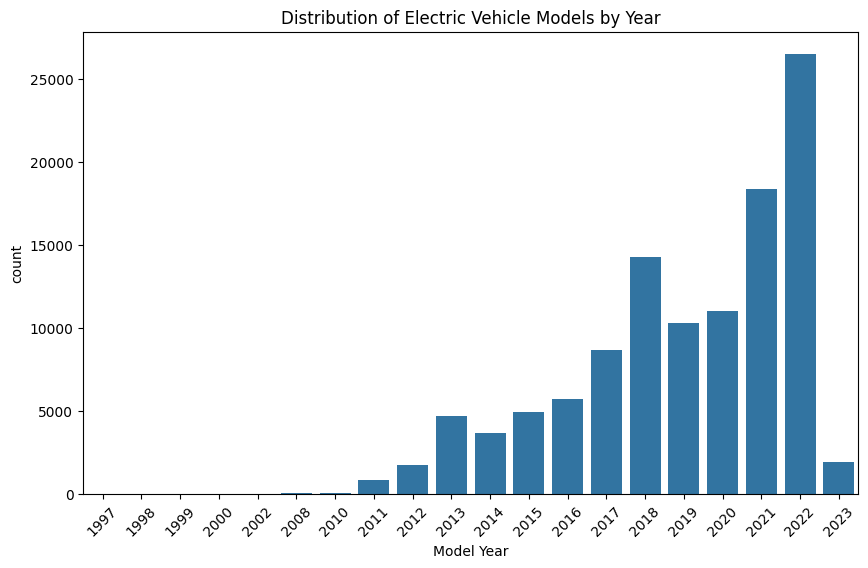

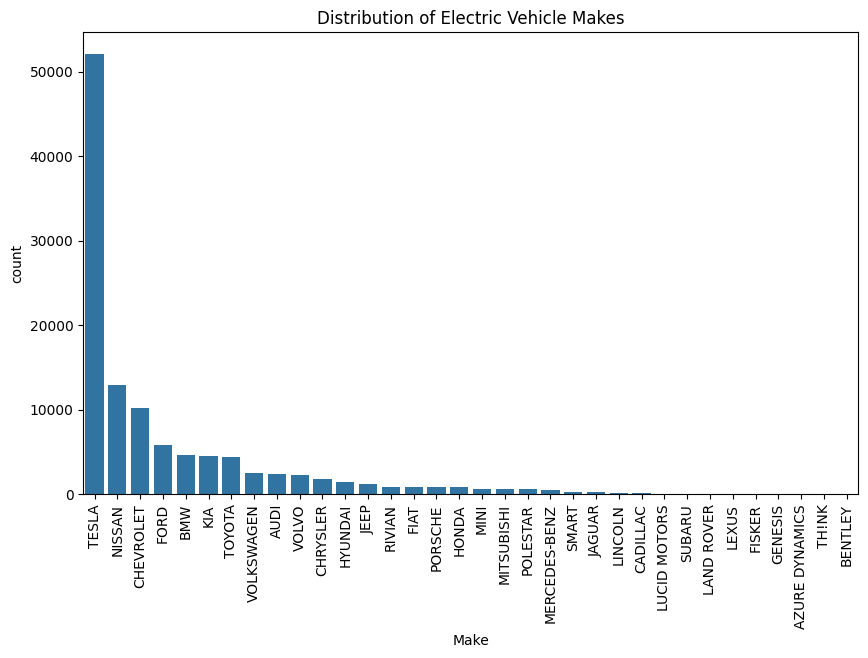

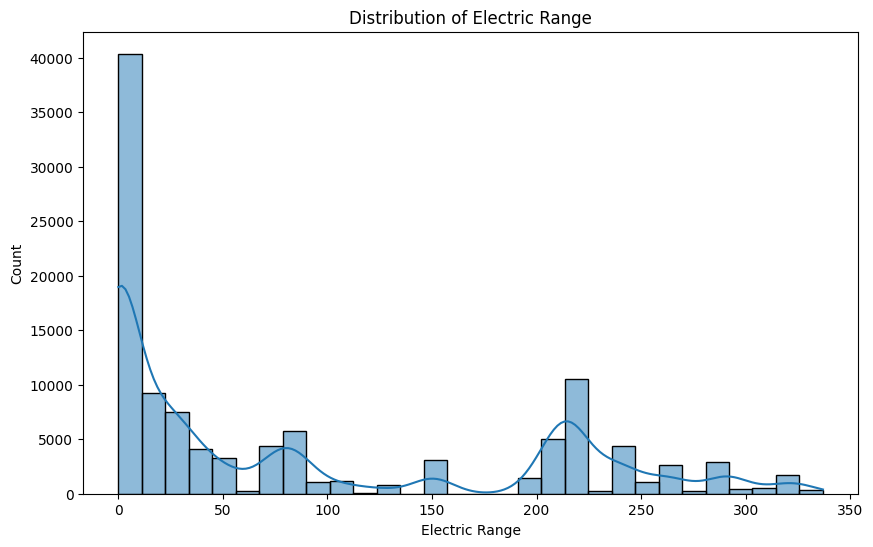

In [6]:
# Univariate Analysis
# Distribution of Electric Vehicle Models by Year
plt.figure(figsize=(10, 6))
sns.countplot(x='Model Year', data=df)
plt.title('Distribution of Electric Vehicle Models by Year')
plt.xticks(rotation=45)
plt.show()

# Distribution of Electric Vehicle Makes
plt.figure(figsize=(10, 6))
sns.countplot(x='Make', data=df, order=df['Make'].value_counts().index)
plt.title('Distribution of Electric Vehicle Makes')
plt.xticks(rotation=90)
plt.show()

# Distribution of Electric Range
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], kde=True, bins=30)
plt.title('Distribution of Electric Range')
plt.show()

**Bivariate Analysis**

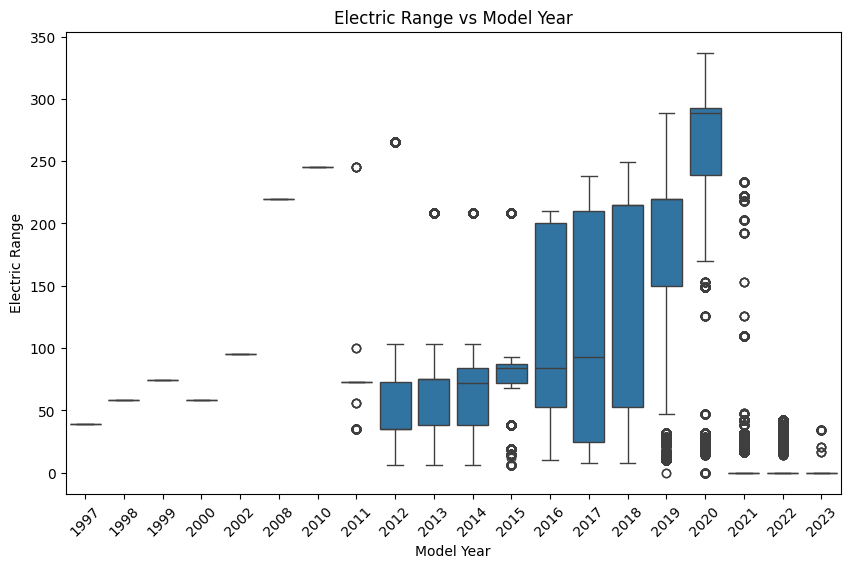

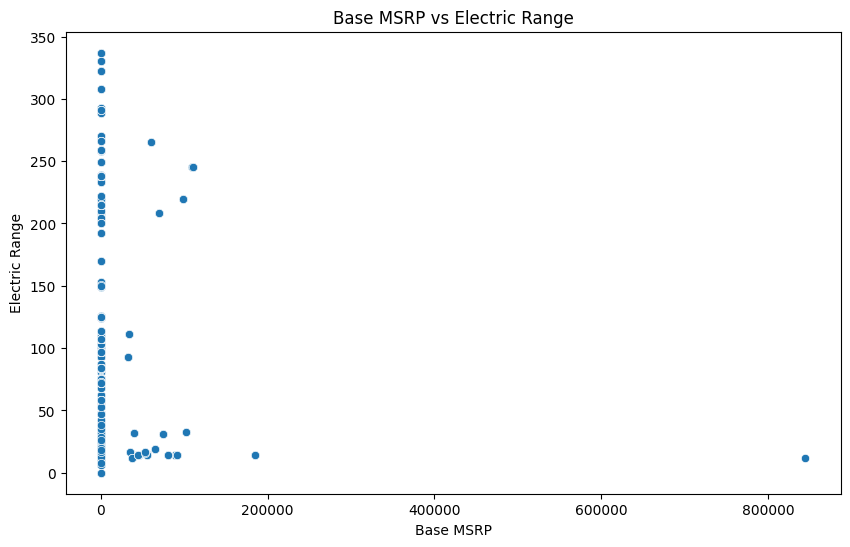

In [7]:
# Bivariate Analysis
# Electric Range vs Model Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model Year', y='Electric Range', data=df)
plt.title('Electric Range vs Model Year')
plt.xticks(rotation=45)
plt.show()

# Base MSRP vs Electric Range
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Base MSRP', y='Electric Range', data=df)
plt.title('Base MSRP vs Electric Range')
plt.show()

**Choropleth of EV vehicles by location**

In [8]:
import plotly.express as px

# Aggregating the data to get the count of EVs per location (State in this case)
location_data = df.groupby('State').size().reset_index(name='EV Count')

# Create Choropleth map
fig = px.choropleth(
    location_data,
    locations='State',  # Column name for state
    locationmode='USA-states',  # 'USA-states' for US states
    color='EV Count',  # Color based on the count of EVs
    hover_name='State',  # Hover text showing state name
    color_continuous_scale='Blues',  # Color scale
    scope='usa',  # Map is limited to USA
    title='Electric Vehicles Count by State'
)

# Show the map
fig.show()

**Racing Bar Plot of EV Make count by year**

In [10]:
pip install pandas matplotlib seaborn plotly


In [19]:
!pip install bar-chart-race



In [21]:
year_ev_count = df.groupby(['Make', 'Model Year']).size().reset_index(name="Electric Vehicle Count")
year_ev_count

,Make,Model Year,Electric Vehicle Count
0,AUDI,2016,214
1,AUDI,2017,187
2,AUDI,2018,174
3,AUDI,2019,392
4,AUDI,2020,224
...,...,...,...
204,VOLVO,2019,190
205,VOLVO,2020,162
206,VOLVO,2021,580
207,VOLVO,2022,882


In [22]:
year_ev_count['Make'].unique()
flag =df.groupby(["Model Year","Make"])["Model Year"].count().unstack()
for col_n in year_ev_count['Make'].unique():
    print("-"*20, col_n, "-"*20)
    print(f"{col_n}:{df[df['Make']==col_n].shape}")

-------------------- AUDI --------------------
AUDI:(2332, 17)
-------------------- AZURE DYNAMICS --------------------
AZURE DYNAMICS:(7, 17)
-------------------- BENTLEY --------------------
BENTLEY:(3, 17)
-------------------- BMW --------------------
BMW:(4680, 17)
-------------------- CADILLAC --------------------
CADILLAC:(108, 17)
-------------------- CHEVROLET --------------------
CHEVROLET:(10182, 17)
-------------------- CHRYSLER --------------------
CHRYSLER:(1794, 17)
-------------------- FIAT --------------------
FIAT:(822, 17)
-------------------- FISKER --------------------
FISKER:(20, 17)
-------------------- FORD --------------------
FORD:(5819, 17)
-------------------- GENESIS --------------------
GENESIS:(18, 17)
-------------------- HONDA --------------------
HONDA:(792, 17)
-------------------- HYUNDAI --------------------
HYUNDAI:(1412, 17)
-------------------- JAGUAR --------------------
JAGUAR:(219, 17)
-------------------- JEEP --------------------
JEEP:(1152, 

In [23]:
df_flag = year_ev_count.pivot_table(index='Model Year', columns='Make', values='Electric Vehicle Count', fill_value=0)
df_flag

Make,AUDI,AZURE DYNAMICS,BENTLEY,BMW,CADILLAC,CHEVROLET,CHRYSLER,FIAT,FISKER,FORD,...,POLESTAR,PORSCHE,RIVIAN,SMART,SUBARU,TESLA,TH!NK,TOYOTA,VOLKSWAGEN,VOLVO
Model Year,,,,,,,,,,,,,,,,,,,,,
1997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0
2011,0.0,4.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0
2012,0.0,3.0,0.0,0.0,0.0,496.0,0.0,0.0,20.0,15.0,...,0.0,0.0,0.0,0.0,0.0,134.0,0.0,385.0,0.0,0.0


In [24]:
pip install python-ffmpeg

In [25]:
import bar_chart_race as bcr
bcr.bar_chart_race(df_flag,

                    n_bars=10,

                    steps_per_period=45,
                    period_length=3000,


                   figsize=(7,4),
                    dpi= 120,
                   title = 'electric vehicle make count over years',

                   # adjust the position and style of the period label
                    period_label={'x': .95, 'y': .1,
                    'ha': 'right',
                    'va': 'center',
                    'size': 15,
                    'weight': 'semibold'
                    },


                    bar_label_size=10,


                    tick_label_size=10,


                    bar_kwargs={'alpha': .99, 'lw': 0},

                   period_fmt='{x:.0f}')

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:226: UserWarning:

Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`

